# Predicting Housing Prices in Singapore 


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

### Small Machine Learning Extensions 
Out of curiosity, as an extension, machine learning techniques can be developed to help predict the housing prices. For machine learning purposes, I choose to use the Executive Central Dataset. To use the original and larger dataset, region and flat type needs to be one hot encoded before it can be used for machine learning. Hence, the Executive Central Dataset was used. 

### How well do our OLS regressions do?
It is also important to understand how well the OLS regression does as well. For this purposes, I will use both the original OLS Beta Values as well as the OLS Beta Values obtained when we segregated the data. 

In [2]:
dataset = pd.read_csv('../Final Analysis/EXECUTIVE CENTRAL REGION.csv', low_memory=False)
predicted = dataset[['ln_real_price']]
dataset.columns

Index(['True', 'town', 'flat_type', 'blk_no', 'street', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price', 'max_floor_lvl', 'year_completed',
       'residential', 'commercial', 'market_hawker', 'miscellaneous',
       'multistorey_carpark', 'precinct_pavilion', 'bldg_contract_town',
       'total_dwelling_units', '1room_sold', '2room_sold', '3room_sold',
       '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold',
       'studio_apartment_sold', '1room_rental', '2room_rental', '3room_rental',
       'other_room_rental', 'building', 'addr', 'Postal', 'SUBZONE_NO',
       'SUBZONE_N', 'PLN_AREA_N', 'REGION_N', 'MRT_NAME', 'mrt_line',
       'mahattan_distance', 'mrt_cbd_dist', 'mrt_cbd_time', 'hdb_cbd_distance',
       'hdb_cbd_time', 'hdb_to_mrtdist', 'sgd_persqm', 'No_Bus_Stops',
       'real_price', 'real_price_persqm', 'lease_remaining', 'Floor_Height',
       'real_price_k', 'log-real_price', 'ln_real_price'],

In [3]:
def predict_orig_ols(floor_area_sqm:float, no_bus_stops:int, hdb_cbd_dist:float, hdb_mrt_dist:float, lease: float, floor_height: int):
        ln_price= floor_area_sqm*0.00990+no_bus_stops*0.000804
        ln_price += hdb_cbd_dist*0.000031*(-1)+hdb_mrt_dist*0.0000208*(-1)
        ln_price += lease*0.00838 + floor_height*0.00692 + 11.80
        return ln_price
   
def predict_region_ols(floor_area_sqm:float, no_bus_stops:int, hdb_cbd_dist:float, hdb_mrt_dist:float, lease: float, floor_height: int):
        ln_price= floor_area_sqm*0.0111+no_bus_stops*0.00662
        ln_price += hdb_cbd_dist*0.0000158*(-1)+hdb_mrt_dist*0.0000329*(-1)
        ln_price += lease*0.0130 + floor_height*0.00853 +11.28
        return ln_price
    
def predict_seg_ols(floor_area_sqm:float, no_bus_stops:int, hdb_cbd_dist:float, hdb_mrt_dist:float, lease: float, floor_height: int):
        ln_price= floor_area_sqm*0.00565+no_bus_stops*0.00693
        ln_price += hdb_cbd_dist*0.00002-hdb_mrt_dist*0.00009
        ln_price += lease*0.00831 + floor_height*0.00916 +12.07
        return ln_price
    
    
def printgraph(x:str,y:str, title:str):
    X=predicted[[x]]
    Y=predicted[[y]]
    
    titlestr = title

    regressor = LinearRegression()
    regressor.fit(X,Y)
    y_pred = regressor.predict(X)
    plt.scatter(X, Y, color = 'red', )
    plt.plot(X, regressor.predict(X), color = 'blue')
    print(f'r_sqr value: {regressor.score(X, Y)}')
    plt.title(titlestr)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()


In [4]:
dataset['orig_ols'] = dataset.apply(lambda row: predict_orig_ols(row.floor_area_sqm,row.No_Bus_Stops, row.hdb_cbd_distance,row.hdb_to_mrtdist, row.lease_remaining, row.Floor_Height), axis=1)
dataset['seg_ols'] = dataset.apply(lambda row: predict_seg_ols(row.floor_area_sqm,row.No_Bus_Stops, row.hdb_cbd_distance,row.hdb_to_mrtdist, row.lease_remaining, row.Floor_Height), axis=1)
dataset['region_ols'] = dataset.apply(lambda row: predict_region_ols(row.floor_area_sqm,row.No_Bus_Stops, row.hdb_cbd_distance,row.hdb_to_mrtdist, row.lease_remaining, row.Floor_Height), axis=1)

In [5]:
predicted['orig_ols'] = dataset['orig_ols']
predicted['seg_ols'] = dataset['seg_ols']
predicted['region_ols'] = dataset['region_ols']

C:\Users\samik\AppData\Local\Temp\ipykernel_2208\2904529690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predicted['orig_ols'] = dataset['orig_ols']
C:\Users\samik\AppData\Local\Temp\ipykernel_2208\2904529690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predicted['seg_ols'] = dataset['seg_ols']
C:\Users\samik\AppData\Local\Temp\ipykernel_2208\2904529690.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [6]:
predicted

,ln_real_price,orig_ols,seg_ols,region_ols
0,13.601079,13.432469,13.597648,13.594956
1,13.735493,13.359103,13.549898,13.506689
2,13.676651,13.354913,13.545742,13.500189
3,13.676651,13.410123,13.575488,13.560289
4,13.774689,13.774312,13.873890,13.998970
...,...,...,...,...
589,13.812506,13.799228,13.776245,13.937004
590,13.772603,13.727134,13.733925,13.854971
591,13.874251,13.805024,13.823510,13.947441
592,13.845069,13.786781,13.759735,13.913438


r_sqr value: 0.14406933230749996


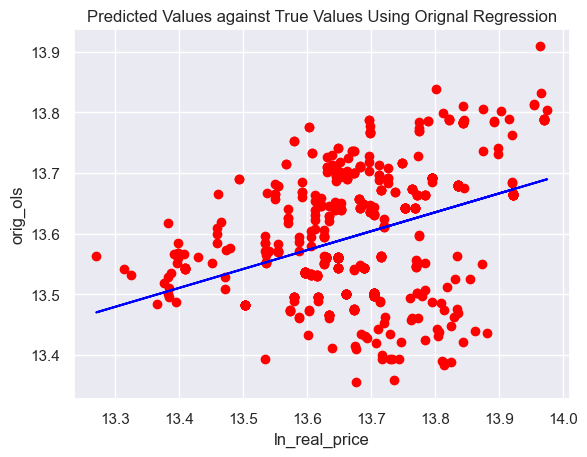

In [7]:
printgraph('ln_real_price', 'orig_ols', 'Predicted Values against True Values Using Orignal Regression')

r_sqr value: 0.5599448843943686


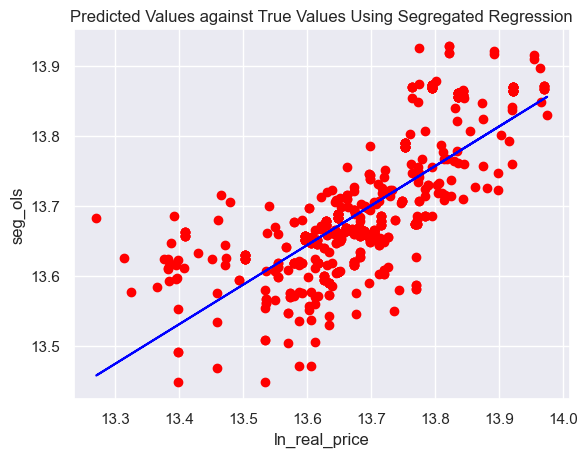

In [8]:
printgraph('ln_real_price', 'seg_ols', 'Predicted Values against True Values Using Segregated Regression')

r_sqr value: 0.321275817214835


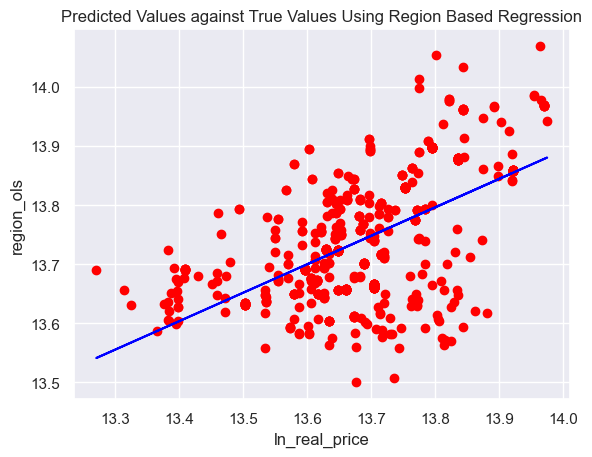

In [9]:
printgraph('ln_real_price', 'region_ols', 'Predicted Values against True Values Using Region Based Regression')

### How did our OLS regression performed?
By segregating the dataset, we are able to see that prediction are better. In fact the R-Squared Value increased when plotting Predicted Against True Values. 

### Can we do better?
Using Random Forests, we can try to predict the prices. 

In [10]:
x = dataset[['floor_area_sqm','No_Bus_Stops','hdb_cbd_distance',
             'hdb_to_mrtdist','lease_remaining','Floor_Height']]
y = dataset[['ln_real_price']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,  random_state=42)

In [11]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)
arr = x.to_numpy()
arr = scale.transform(arr)

C:\Users\samik\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [12]:
model = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_split=5, min_samples_leaf=5, max_depth=10, bootstrap=True)
model.fit(x_train, y_train)
predict = model.predict(arr)
predicted['Random_Forest'] = pd.Series(predict)

C:\Users\samik\AppData\Local\Temp\ipykernel_2208\2505674674.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
C:\Users\samik\AppData\Local\Temp\ipykernel_2208\2505674674.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predicted['Random_Forest'] = pd.Series(predict)


In [13]:
predicted

,ln_real_price,orig_ols,seg_ols,region_ols,Random_Forest
0,13.601079,13.432469,13.597648,13.594956,13.680435
1,13.735493,13.359103,13.549898,13.506689,13.678620
2,13.676651,13.354913,13.545742,13.500189,13.678620
3,13.676651,13.410123,13.575488,13.560289,13.681362
4,13.774689,13.774312,13.873890,13.998970,13.712703
...,...,...,...,...,...
589,13.812506,13.799228,13.776245,13.937004,13.838565
590,13.772603,13.727134,13.733925,13.854971,13.800640
591,13.874251,13.805024,13.823510,13.947441,13.848304
592,13.845069,13.786781,13.759735,13.913438,13.840343


r_sqr value: 0.9041302077527472


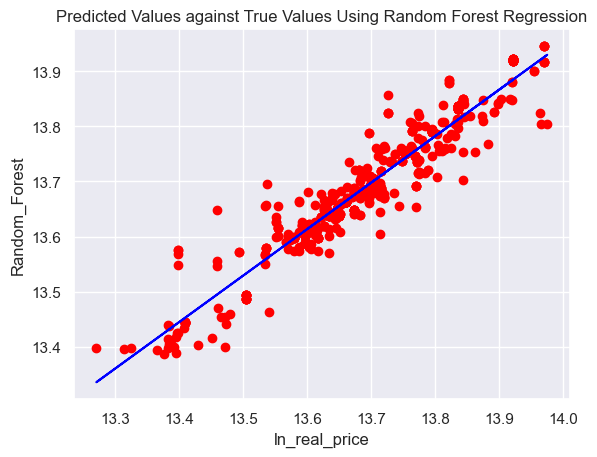

In [14]:
printgraph('ln_real_price', 'Random_Forest', 'Predicted Values against True Values Using Random Forest Regression')

In [25]:
grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}
rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'random_state': 42, 'n_estimators': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 11, 'bootstrap': True}


C:\Users\samik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [26]:
model = RandomForestRegressor(n_estimators=20, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=11, bootstrap=True)
model.fit(x_train, y_train)
predict = model.predict(arr)
predicted['Random_Forest_Opt'] = pd.Series(predict)

C:\Users\samik\AppData\Local\Temp\ipykernel_2208\2889318272.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
C:\Users\samik\AppData\Local\Temp\ipykernel_2208\2889318272.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predicted['Random_Forest_Opt'] = pd.Series(predict)


r_sqr value: 0.9577676847204982


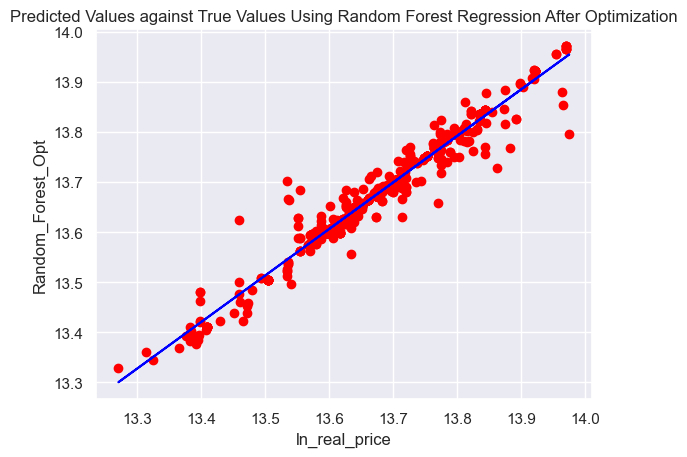

In [27]:
printgraph('ln_real_price', 'Random_Forest_Opt', 'Predicted Values against True Values Using Random Forest Regression After Optimization')

### Analysis 
While this is only applied to Executive Central, it can be applied to the other data points collected (e.g. 2 Room North East, 3 Room North). A good point to note here is that OLS regressions do help us in pin pointing factors that are helpful in predicting prices. These factors can then be fitted into the Random Forest or any other machine learning models to get a better prediction accuracy. Ideally, much more can be done. 

### Machine Learning
Ideally, you would one hot encode the flat type and region to help make the model more flexible when it comes to predicting. Additionally, more factors can be added. Random Forest is not the only machine learning tool out there and other techniques could be used to make the model more flexible to a variety of data. 